# 项目：调查TMDB电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 在这个项目中，我们将探索**TMDb电影数据**相关的数据集，该数据集中包含 1 万条左右的电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包含用户评分和票房，导演等字段。针对该数据集，我们主要探索以下两个问题：

> **问题一** 众多类型的电影中，哪种类型的电影比较收欢迎？

> **问题二** 哪些因素会影响到电影收入，比如流行度、预算，评价等？

In [67]:
# 导入需要的包
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 设置图表样式
sns.set_style('darkgrid')

<a id='wrangling'></a>
## 数据整理

> 首先加载数据，检查数据简洁度，然后为了整理和清理数据集做准备，以便更好分析数据。

### 常规属性

In [68]:
# 加载数据并打印几行。进行这几项操作，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> 从上面的列表可以看出数据的大致格式，“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值,还有很多本次分析探索不需要的列，比如“id”，“概述(overview)”等。

In [69]:
# 查看数据集概要
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> 从数据集的概要中看到该数据集有10866条记录，但是有个别数据列缺失数据，比如“电影主页(homepage)”、“标签行(tagline)”等，这些都是我们数据清理的主要目标。

### 数据清理

#### 第一步 清除无用列

In [70]:
# 删除无用列
df.drop(['id','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace=True)
# 返回当前数据集形状
df.shape

(10866, 15)

#### 第二步 清除含有空值的行

In [71]:
# 删除含有空值的行
df.dropna(inplace=True)
# 返回当前数据集形状
df.shape

(10727, 15)

#### 第三步 清除重复行

In [72]:
# 清理重复行
df.drop_duplicates(inplace=True)
# 返回当前数据集形状
df.shape

(10726, 15)

#### 第四步 列数据展开

> 为了探索电影类型相关数据，我们需要将“体裁genres”列展开，以便得到该电影所属的所用电影的类型，最后对各种类型的电影数量进行统计。

In [73]:
# “体裁genres”列展开并去重
genres_set = set()
for items in df['genres'].unique():
    for item in items.split('|'):
        genres_set.add(item)
# 将得到的类型数据排序
genres = sorted(list(genres_set))
# 查看得到的类型
genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

> 上面的类型数据不符合我们需要的格式，首先是首字母大写，而我们的列都是小写的，其次是数据中含有空格，我们需要将空格替换为下划线，最后为了区别这些类型列与其他数据列的不同，我们需要给每一列增加一个前缀“genre”。

In [74]:
# 格式化展开的数据列
for genre in genres:
    # 如果当前列属于该影片的类型之一则返回数值1,否则返回0
    df[genre] = df.genres.apply(lambda x:1 if genre in x else 0)
    # 修改列名并追加前缀
    df.rename(index=str,columns={genre:'genre_' + genre.replace(' ','_').lower()},inplace=True)
# 删除旧的“genres(体裁)”列
df.drop('genres',axis=1,inplace=True)

In [75]:
# 打印几行数据检查是否格式化成功
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,...,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science_fiction,genre_tv_movie,genre_thriller,genre_war,genre_western
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,...,0,0,0,0,0,1,0,1,0,0
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,...,0,0,0,0,0,1,0,1,0,0
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,...,0,0,0,0,0,1,0,1,0,0


In [76]:
# 检查数据集信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 0 to 10865
Data columns (total 34 columns):
imdb_id                  10726 non-null object
popularity               10726 non-null float64
budget                   10726 non-null int64
revenue                  10726 non-null int64
original_title           10726 non-null object
cast                     10726 non-null object
director                 10726 non-null object
runtime                  10726 non-null int64
release_date             10726 non-null object
vote_count               10726 non-null int64
vote_average             10726 non-null float64
release_year             10726 non-null int64
budget_adj               10726 non-null float64
revenue_adj              10726 non-null float64
genre_action             10726 non-null int64
genre_adventure          10726 non-null int64
genre_animation          10726 non-null int64
genre_comedy             10726 non-null int64
genre_crime              10726 non-null int64
genre_doc

> 至此，数据格式化成功，当前数据集有10726行，34列，接下来我们可以使用最新的数据集展开分析了。


<a id='eda'></a>
## 探索性数据分析

### 研究问题 1 众多类型的电影中，哪种类型的电影比较收欢迎？

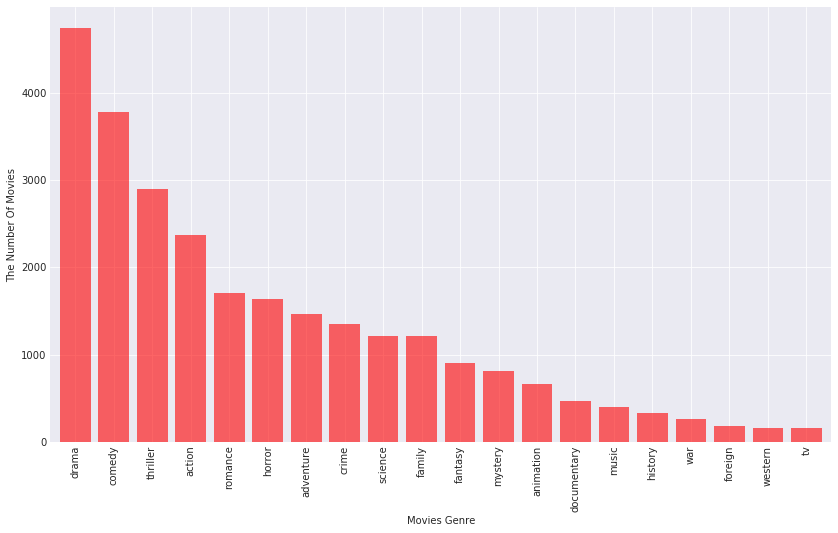

In [77]:
# 统计历年来哪种类型的电影拍摄的最多，并从高到底排序
df_genres = df.iloc[:,14:].sum().copy().sort_values(ascending=False)
# X轴标签不需要前缀，删除前缀
df_genres.rename(lambda x:x.split('_')[1],inplace=True)
# 显示柱状图
plt.figure(figsize=(14, 8))
df_genres.T.plot.bar(color='red',width=0.8,alpha=0.6)
plt.xlabel('Movies Genre')
plt.ylabel('The Number Of Movies')
plt.show()

> 从上面的柱状图中我们可以观察到"剧情(drama)"类的电影占比最多，"喜剧(Comedy)"电影和"惊悚(Thriller)"电影也比较受欢迎；而”西部Western“片和TV等类型的影片所占比重就比较小了。

### 研究问题 2 哪些因素会影响到电影收入，比如流行度、预算，评价等？

> 接下来，我们研究哪些因素可能会影响电影收入，我们从数据集中抽取三项，分别研究流行度(popularity)、预算(budget)，评价(vote count)对电影收入的影响。不过在此之前，需要再次清理数据，删掉在问题一中我们展开的列。

#### 再次清理数据

In [78]:
# 再次清理数据，删掉电影类型相关的列
df.drop(df.columns[14:],axis=1,inplace=True)
# 检查数据集
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 0 to 10865
Data columns (total 14 columns):
imdb_id           10726 non-null object
popularity        10726 non-null float64
budget            10726 non-null int64
revenue           10726 non-null int64
original_title    10726 non-null object
cast              10726 non-null object
director          10726 non-null object
runtime           10726 non-null int64
release_date      10726 non-null object
vote_count        10726 non-null int64
vote_average      10726 non-null float64
release_year      10726 non-null int64
budget_adj        10726 non-null float64
revenue_adj       10726 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


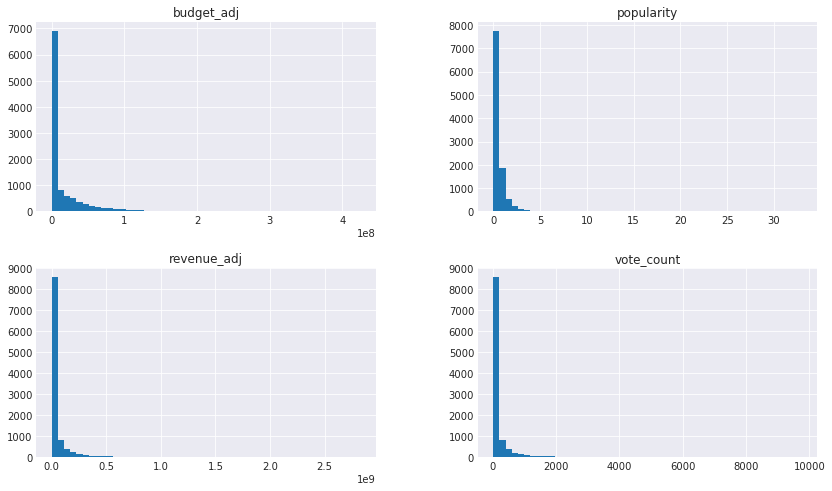

In [79]:
# 针对要分析的项目，分析各项数值的分布情况。
# 预算(budget_adj) 流行度(popularity) 电影收入(revenue_adj),用户投票数量(vote_count)
df.iloc[:,[1,-5,-1,-2]].hist(figsize=(14, 8),bins=50);

> 从上面的直方图看出，四个列中第一个柱状体都存在偏高值，因为我们需要分析流行度、预算、和用户投票数对电影收入的影响，0值数据对我们的分析没有用途，所以需要分析各个列中0值的数量。

In [80]:
# 查看流行度的0值数量
df.query('popularity == 0').shape[0]

0

In [81]:
# 查看用户投票数的0值数量
df.query('vote_count == 0').shape[0]

0

In [82]:
# 查看预算的0值数量
df.query('budget_adj == 0').shape[0]

5574

In [83]:
# 查看电影收入的0值数量
df.query('revenue_adj == 0').shape[0]

5883

In [84]:
# 过滤掉预算和电影收入为0的数据
df = df.query('budget_adj >0 and revenue_adj>0')
df.shape

(3849, 14)

> 预算和电影收入为0的数据都比较多，所以过滤掉为0的数据后，就可以使用清洗与过滤后数据集进行下面分析探索了。

#### 流行度与电影收入

> 首先我们先研究"流行度(popularity)"与电影收入的关系，为了看起来清晰，我们需要过滤掉部分异常值，选择流行度小于等于15的数据。

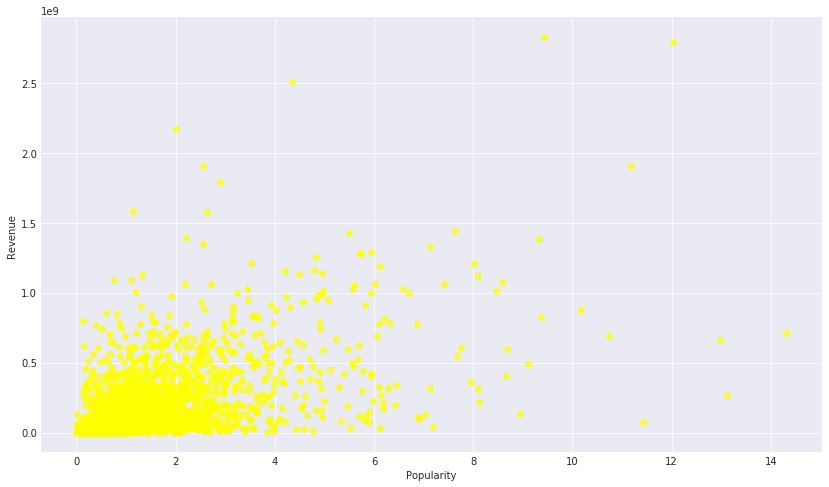

In [85]:
# 过滤异常值,选取流行度小于等于15的记录
df_pop = df.query('popularity <= 15')
# 散点图 y轴代表收入 x轴代表"流行度(popularity)"
plt.figure(figsize=(14, 8))
plt.scatter(x=df_pop['popularity'],y=df_pop['revenue_adj'],alpha=0.7,color='yellow')
plt.ylabel('Revenue')
plt.xlabel('Popularity')
plt.show()

> 从上面的散点图中我们可以看出，随着流行度的增加，电影收入是呈逐渐增加的趋势。

#### 预算与电影收入

> 其次我们研究投入"预算(Budget)"的多少与电影收入的关系，为了看起来清晰，我们需要过滤掉部分异常值，选择流行度小于等于2亿的数据。

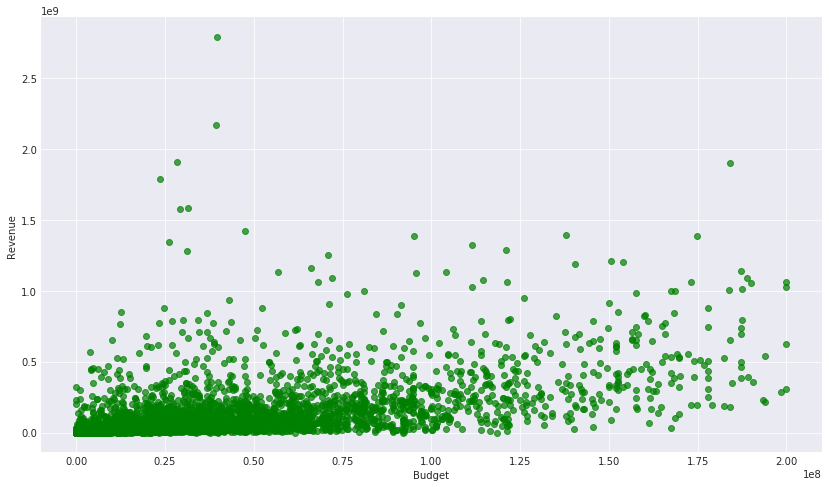

In [86]:
# 过滤异常值,选取预算小于等于200000000的记录
df_bud = df[df['budget_adj'] <= 200000000]
# 散点图 y轴代表收入 x轴代表"预算(budget)"
plt.figure(figsize=(14, 8))
plt.scatter(x=df_bud['budget_adj'],y=df_bud['revenue_adj'],alpha=0.7,color='green')
plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.show()

> 从上面的散点图中我们可以看出，随着流行度的增加，电影收入是呈逐渐增加的趋势。

#### 用户评分与电影收入

> 最后我们研究用户评分与电影收入的关系，我们使用"用户投票数量(Ｖote count)"来代表用户评分，见下方散点图。

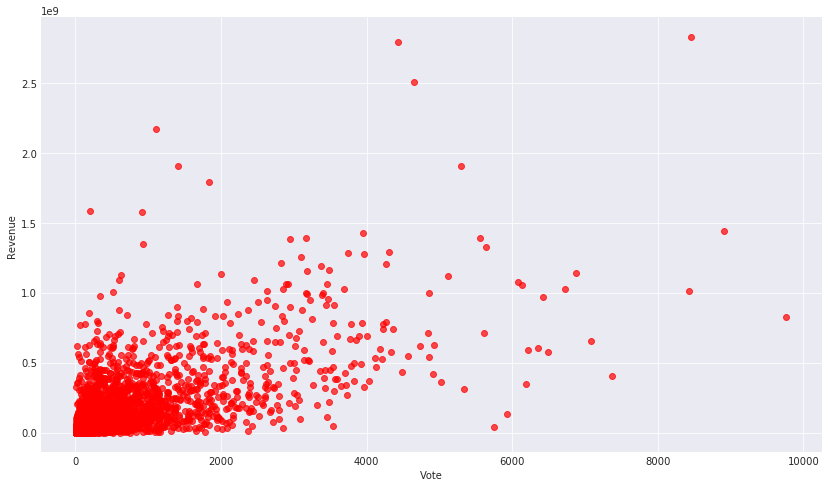

In [87]:
plt.figure(figsize=(14, 8))
# 散点图 y轴代表收入 x轴代表"用户投票数量(Ｖote count)""
plt.scatter(x=df['vote_count'],y=df['revenue_adj'],alpha=0.7,color='red')
plt.ylabel('Revenue')
plt.xlabel('Vote')
plt.show()

> 从上面的散点图中我们可以看出，用户投票越多的电影，电影的收入是呈逐渐增加的趋势。

<a id='conclusions'></a>
## 结论

> 经过对TMDB电影数据集的分析、整理、清洗到探索等等步骤，对于前面所提出的两个问题，我们取得了不错的进展。问题一中，哪些类型的电影更受欢迎，我们从柱状图中看出剧情、喜剧类的电影拍摄的比较多，可能是比较受欢迎的类型。问题二中，我们分别通过对三个特征列与电影收入关系的散点图发现随着流行度、影片预算与用户投票数量的增加，电影的收入也会呈增长的态势。

> 需要说明的是目前样本数据只有10000条左右，可能随着其他地域样本的加入、以及时间推移等因素，也许会造成趋势的不同。特征属性也不够多，比如问题一，如果加入了代表地域因素的特征属性，比如按国家分类，也许在每个不同的国家最受欢迎的电影类型是不同的。另外，在问题二的探索分析中，因为0值的关系一次性过滤掉了大部分的数据,样本从10000条左右降低到3800条左右，在分析流行度以及用户投票数对电影收入影响的时候，也许会产生一定的偏差或者失真现象。综上所述，现在我们得到的结论是暂时的，未来有进一步改进的可能。

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-zh.ipynb'])

0